<a href="https://colab.research.google.com/github/renanalencar/projeto-md-emocoes/blob/main/entregas/Assign5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><b> Pré-processamento

<h3><b>Importando as Bibliotecas

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<b><h3>Importando a Base de dados

In [ ]:
tedio = pd.read_excel('/content/drive/MyDrive/dadosTedioB.xlsx')
tedio.drop('p24.1',axis=1,inplace=True)
estresse = pd.read_excel('/content/drive/MyDrive/dadosEstresseB.xlsx')
estresse.drop('p24.1',axis=1,inplace=True)
tedio = tedio.drop(["game_name"], axis=1)

<b><h3>Calculando os valores em zeros(não nulos, mas sem capturas)

In [ ]:
tedio['p2'].eq(0).sum()

2949

<b><h3> Calculando a média

In [ ]:
print('A média é ' + str(tedio['p2'].mean()))

A média é 0.011632294659395673


<h3><b> Substituíndo os valores em zero pela média

In [ ]:
media = tedio
media['p2'] = media['p2'].replace(0,media['p2'].mean())

<b><h3> Nova verificação de valores em 0

In [ ]:
media['p2'].eq(0).sum()

0

<b><h3>Descrição dos dados

In [ ]:
media['p2'].describe()

count    27803.000000
mean         0.012866
std          0.246022
min         -2.077938
25%         -0.091652
50%          0.011632
75%          0.107585
max          4.122911
Name: p2, dtype: float64

<b><h3> Histogramas para comparação

<b><h4> Base Original

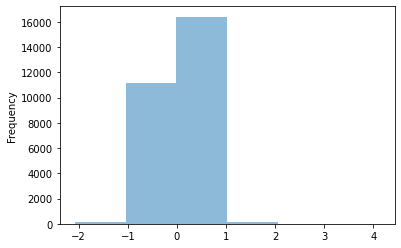

In [ ]:
tedio['p2'].plot.hist(bins=6, alpha=0.5)

<b><h4> Após a substituição dos 0s pela média

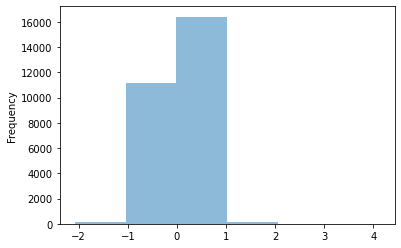

In [ ]:
media['p2'].plot.hist(bins=6, alpha=0.5)

<b><h3>Gráfico de dispersão

<b><h4> Base Original

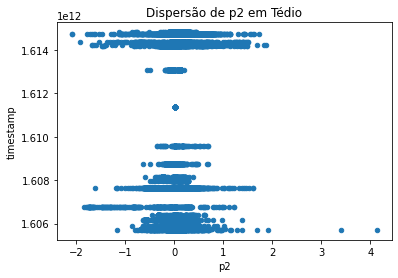

In [ ]:
tedio.plot.scatter(x='p2', y='timestamp',title="Dispersão de p2 em Tédio")

<b><h4> Após a substituição dos 0s pela média

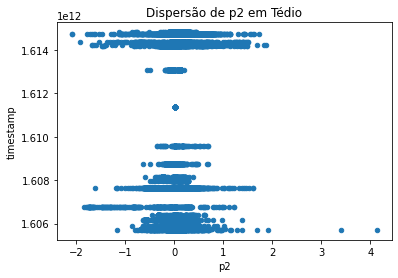

In [ ]:
media.plot.scatter(x='p2', y='timestamp',title="Dispersão de p2 em Tédio")

<b><h3>Boxplot

<b><h4> Base Original

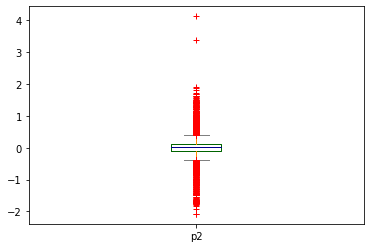

In [ ]:
color = {
  "boxes": "DarkGreen",
  "whiskers": "DarkOrange",
  "medians": "DarkBlue",
  "caps": "Gray",
}

tedio['p2'].plot.box(color=color, sym="r+")

<b><h4> Após a substituição dos 0s pela média

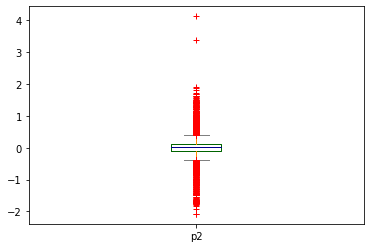

In [ ]:
color = {
  "boxes": "DarkGreen",
  "whiskers": "DarkOrange",
  "medians": "DarkBlue",
  "caps": "Gray",
}

media['p2'].plot.box(color=color, sym="r+")

<b><h3>Verificação e retirada de Outlier

<b><h4> Cálculo do limite superior

In [ ]:
maximo = media['p2'].mean() + 2*media['p2'].std()
maximo 

0.5049099434141416

<b><h4> Cálculo do limite inferior

In [ ]:
minimo = media['p2'].mean() - 2*media['p2'].std()
minimo

-0.4791777328350122

<b><h4> Aplicação dos limites superior e inferior como filtro para base

In [ ]:
filtro1 = media['p2'] <= maximo
filtro2 = media['p2'] >= minimo
media = media[filtro1]
media = media[filtro2]

In [ ]:
print('O tamanho era de ' + str(len(tedio['p2'])) + ' e passa a ser de ' + str(len(media['p2'])))
print('A diferença é de ' +  str((len(tedio['p2']) -len(media['p2']))))

O tamanho era de 27971 e passa a ser de 26342
A diferença é de 1629


<b><h3> Histogramas para comparação

<b><h4> Base Original

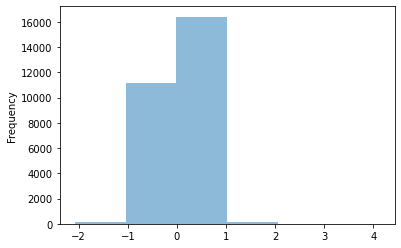

In [ ]:
tedio['p2'].plot.hist(bins=6, alpha=0.5)

<b><h4> Após a retirada de outliers 

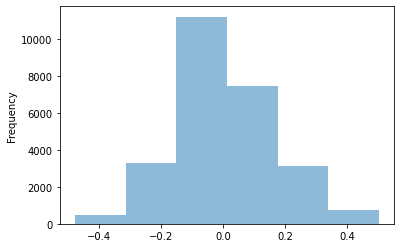

In [ ]:
media['p2'].plot.hist(bins=6, alpha=0.5)

<b><h3> Gráfico de Dispersão

<b><h4> Base Original

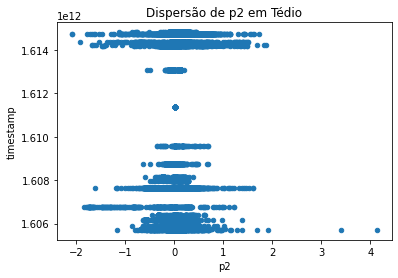

In [ ]:
tedio.plot.scatter(x='p2', y='timestamp',title="Dispersão de p2 em Tédio")

<b><h4> Após a retirada de outliers 

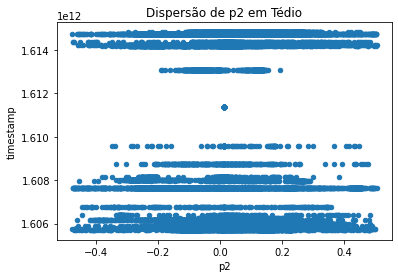

In [ ]:
media.plot.scatter(x='p2', y='timestamp',title="Dispersão de p2 em Tédio")

<b><h3> Boxplot

<b><h4> Base Original

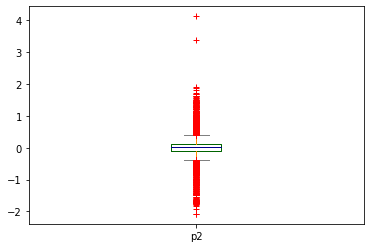

In [ ]:
color = {
  "boxes": "DarkGreen",
  "whiskers": "DarkOrange",
  "medians": "DarkBlue",
  "caps": "Gray",
}

tedio['p2'].plot.box(color=color, sym="r+")

<b><h4> Após a retirada de outliers 

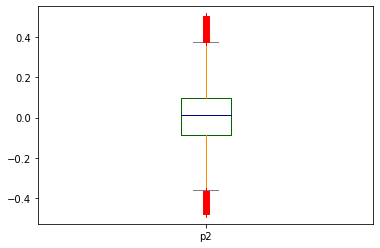

In [ ]:
color = {
  "boxes": "DarkGreen",
  "whiskers": "DarkOrange",
  "medians": "DarkBlue",
  "caps": "Gray",
}

media['p2'].plot.box(color=color, sym="r+")

<h2><b> Descrição final dos dados

<h4><b> Base Original

In [ ]:
tedio['p2'].describe()

count    27803.000000
mean         0.012866
std          0.246022
min         -2.077938
25%         -0.091652
50%          0.011632
75%          0.107585
max          4.122911
Name: p2, dtype: float64

In [ ]:
print('A amplitude é de '+ str(tedio['p2'].max() - tedio['p2'].min()))

A amplitude é de 6.200849101570231


<h4><b> Após a retirada dos outliers

In [ ]:
media['p2'].describe()

count    26342.000000
mean         0.010952
std          0.157471
min         -0.478066
25%         -0.085624
50%          0.011632
75%          0.098301
max          0.503445
Name: p2, dtype: float64

In [ ]:
print('A amplitude é de '+ str(media['p2'].max() - media['p2'].min()))

A amplitude é de 0.9815105755228521
